In [2]:
import pandas as pd

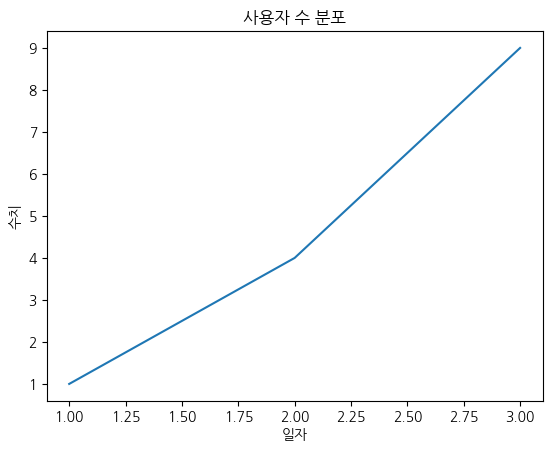

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 설치된 나눔고딕 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 설정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 테스트 출력
plt.plot([1, 2, 3], [1, 4, 9])
plt.title('사용자 수 분포')
plt.xlabel('일자')
plt.ylabel('수치')
plt.show()


# RFM 분석하기

In [33]:
df = pd.read_csv('./df_clean.csv')

In [34]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumMyeongjo',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare']

In [108]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

## RFM 뽑아내기(멤버십 구독한 사람들만 뽑아낼거임)

In [110]:
import pandas as pd

# 날짜 변환
df['OrderDT'] = pd.to_datetime(df['OrderDT'])

# 분석 기준일
analysis_date = df['OrderDT'].max()
cutoff_date = analysis_date - pd.Timedelta(days=180)

# 최근 6개월 주문만 필터링
df_recent = df[df['OrderDT'] >= cutoff_date]

# RFM 계산
rfm = df_recent.groupby('idUser').agg({
    'OrderDT': lambda x: (analysis_date - x.max()).days,
    'idOrder': 'nunique',
    'Price': 'sum'
}).reset_index()

rfm.columns = ['idUser', 'Recency', 'Frequency', 'Monetary']

# 멤버십 정보 추출 (가장 최근 기준 or 고정값 하나 선택)
membership = df_recent.groupby('idUser')['MemberYN'].last().reset_index()

# 병합
rfm = pd.merge(rfm, membership, on='idUser', how='left')

# 결과 확인
print(rfm.head())


   idUser  Recency  Frequency  Monetary MemberYN
0  U10001        4          9    782540        Y
1  U10002       25         10    952650        Y
2  U10003        8         12   1091860        Y
3  U10004       26          4    328520        N
4  U10005       41         14   1231700        Y


  MemberYN     Ratio
0        Y  0.718573
1        N  0.281427


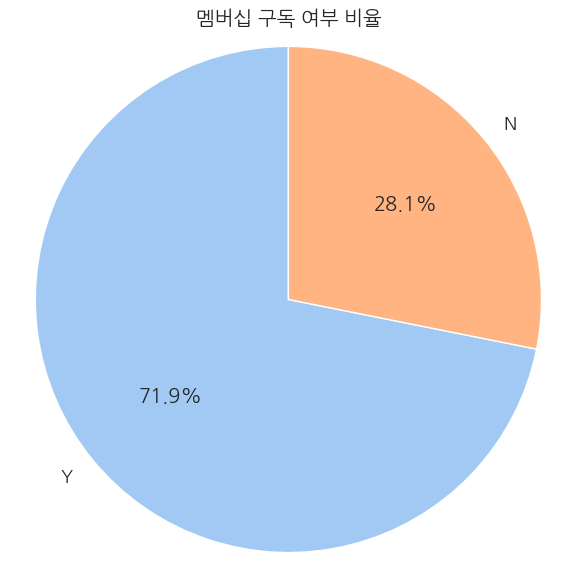

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 구독 여부 비율 표 계산
member_ratio = rfm['MemberYN'].value_counts(normalize=True).reset_index()
member_ratio.columns = ['MemberYN', 'Ratio']
print(member_ratio)

# 2. 구독 여부 파이차트 시각화
plt.figure(figsize=(6, 6))
plt.pie(member_ratio['Ratio'],
        labels=member_ratio['MemberYN'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('멤버십 구독 여부 비율')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [112]:
# 멤버십 구독 여부별 평균 주문 금액(Monetary), 주문 횟수(Frequency) 계산
member_summary = rfm.groupby('MemberYN')[['Monetary', 'Frequency']].mean().reset_index()
member_summary.columns = ['MemberYN', 'AvgMonetary', 'AvgFrequency']
print(member_summary)


  MemberYN    AvgMonetary  AvgFrequency
0        N  969528.767773      10.39218
1        Y  955156.589327      10.27239


In [37]:
import pandas as pd

# 날짜 변환
df['OrderDT'] = pd.to_datetime(df['OrderDT'])

# 분석 기준일
analysis_date = df['OrderDT'].max()
cutoff_date = analysis_date - pd.Timedelta(days=180)

# 최근 6개월 데이터 필터링
df_recent = df[df['OrderDT'] >= cutoff_date]

# 멤버십 구독 고객만 필터링
df_member = df_recent[df_recent['MemberYN'] == 'Y']

# RFM 계산
rfm = df_member.groupby('idUser').agg({
    'OrderDT': lambda x: (analysis_date - x.max()).days,  # Recency
    'idOrder': 'nunique',                                 # Frequency
    'Price': 'sum'                                        # Monetary
}).reset_index()

# 컬럼명 정리
rfm.columns = ['idUser', 'Recency', 'Frequency', 'Monetary']

# 결과 확인
print(rfm.head())


   idUser  Recency  Frequency  Monetary
0  U10001        4          9    782540
1  U10002       25         10    952650
2  U10003        8         12   1091860
3  U10005       41         14   1231700
4  U10008        5         12    865940


In [38]:
# first_purchase = df.groupby('idUser')['OrderDT'].min().reset_index()
# first_purchase.columns = ['idUser', 'FirstOrderDT']

# # 현재 RFM 분석 기준일과 비교해 신규 여부 판단
# rfm = rfm.merge(first_purchase, on='idUser')
# rfm['is_new'] = (analysis_date - rfm['FirstOrderDT']).dt.days <= 360


In [39]:
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumGothic')  # 나눔고딕

# # 신규 vs 기존 고객 수 계산
# new_vs_old = rfm['is_new'].value_counts()
# labels = ['기존 고객', '신규 고객']
# sizes = [new_vs_old[False], new_vs_old[True]]

# # 파이 차트 시각화
# plt.figure(figsize=(6, 6))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# plt.title('신규 고객 비율')
# plt.axis('equal')
# plt.show()


In [40]:
rfm

,idUser,Recency,Frequency,Monetary
0,U10001,4,9,782540
1,U10002,25,10,952650
2,U10003,8,12,1091860
3,U10005,41,14,1231700
4,U10008,5,12,865940
...,...,...,...,...
2150,U12993,69,8,648280
2151,U12994,0,14,1077310
2152,U12997,5,14,1246580
2153,U12998,34,8,730510


In [41]:
rfm.describe()

,Recency,Frequency,Monetary
count,2155.000000,2155.000000,2.155000e+03
mean,16.019954,10.272390,9.551566e+05
std,17.617837,3.270327,3.278677e+05
min,0.000000,1.000000,5.782000e+04
25%,4.000000,8.000000,7.243600e+05
50%,11.000000,10.000000,9.332800e+05
75%,21.000000,12.000000,1.167225e+06
max,131.000000,22.000000,2.196590e+06


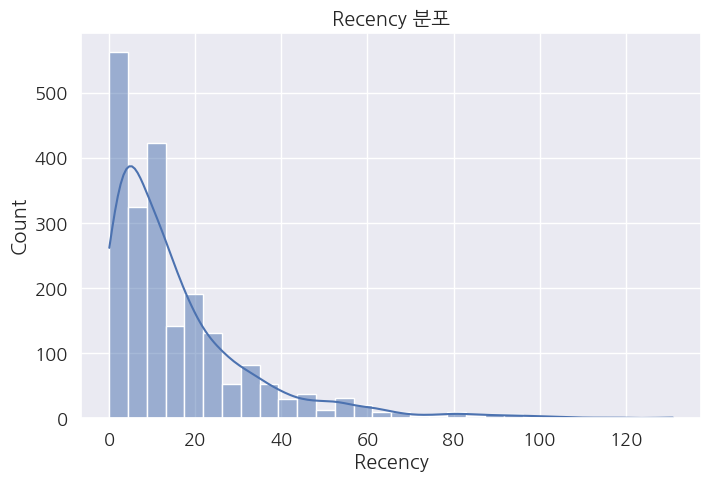

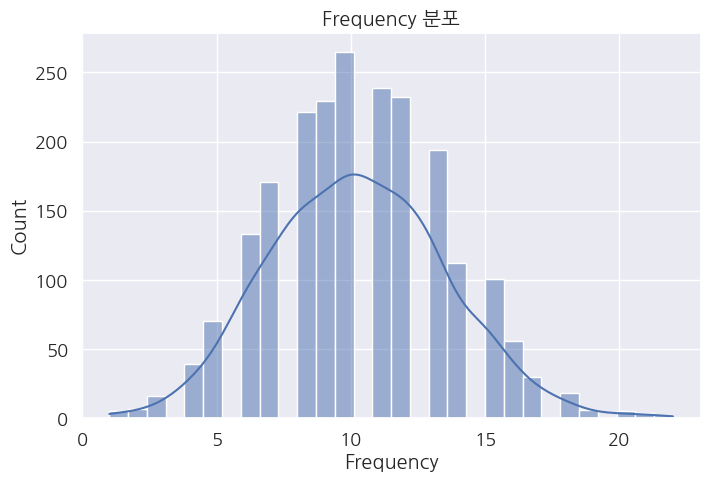

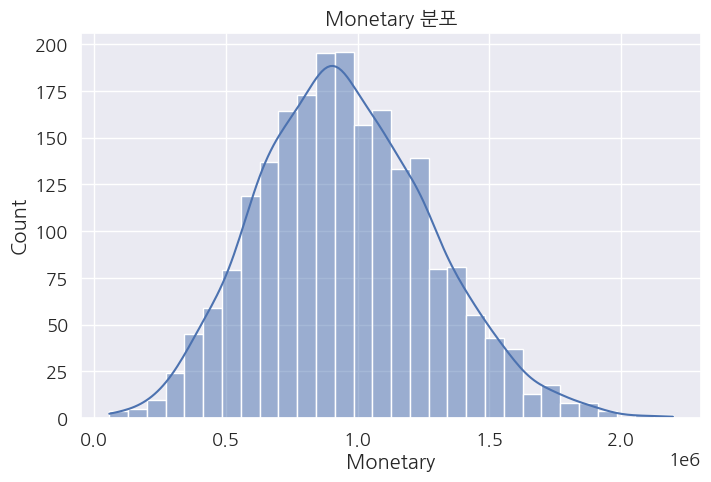

In [42]:
import seaborn as sns

# 시각화 설정
plt.style.use('ggplot')

# 한글 폰트를 seaborn에도 명시적으로 적용
sns.set_theme(font=font_name, font_scale=1.2)

# RFM 컬럼 리스트
rfm_cols = ['Recency', 'Frequency', 'Monetary']

# 히스토그램 그리기
for col in rfm_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(rfm[col], bins=30, kde=True)
    plt.title(f'{col} 분포')
    plt.xlabel(col)


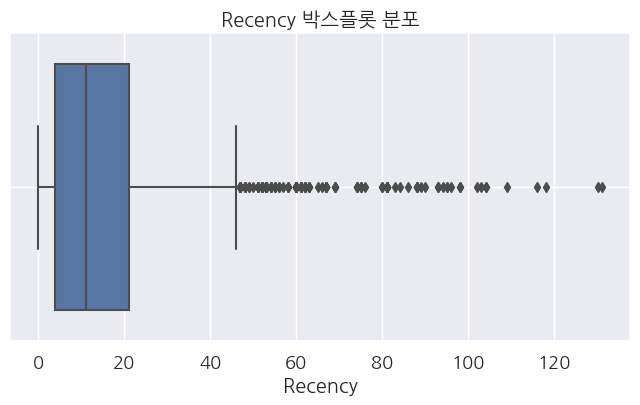

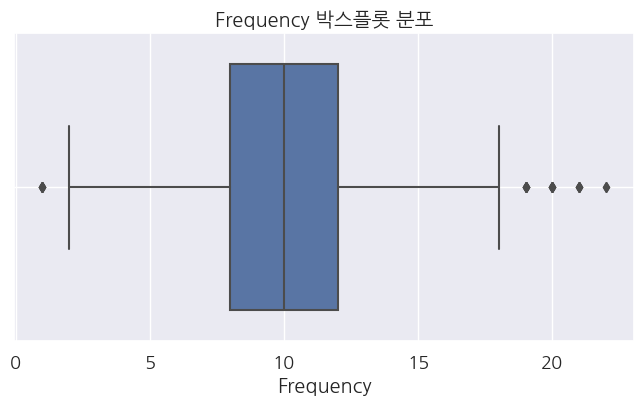

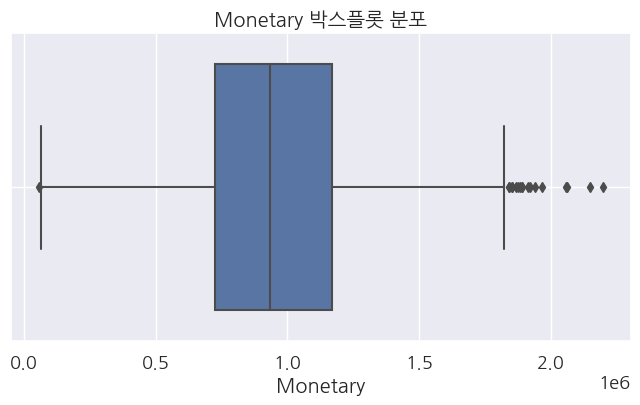

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')  # 나눔고딕 폰트 설정

rfm_cols = ['Recency', 'Frequency', 'Monetary']

for col in rfm_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=rfm[col])
    plt.title(f'{col} 박스플롯 분포')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


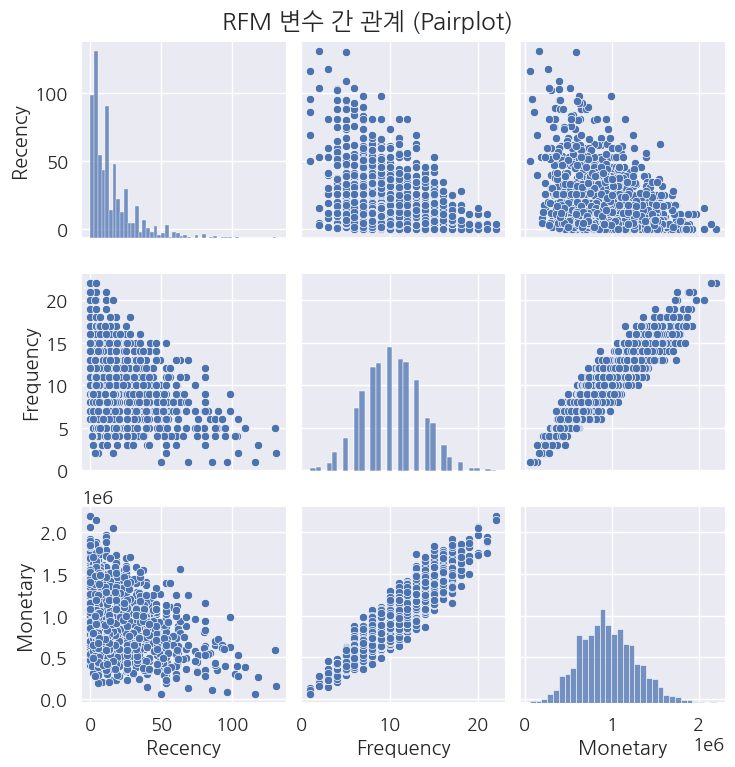

In [44]:
sns.pairplot(rfm[rfm_cols])
plt.suptitle('RFM 변수 간 관계 (Pairplot)', y=1.02)
plt.show()


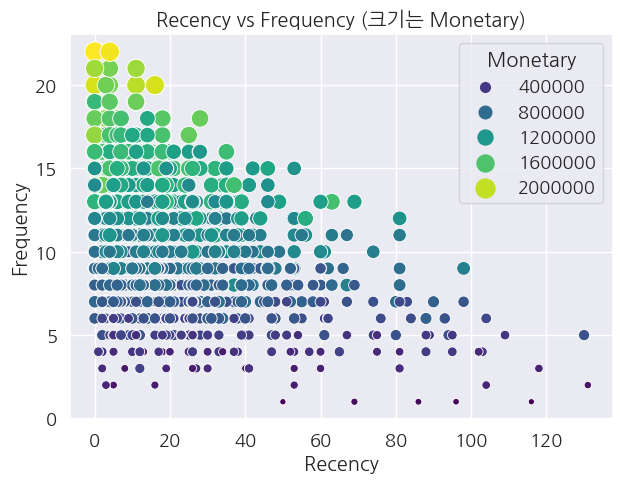

In [45]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', size='Monetary', hue='Monetary', palette='viridis', sizes=(20, 200))
plt.title('Recency vs Frequency (크기는 Monetary)')
plt.grid(True)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


In [46]:
rfm

,idUser,Recency,Frequency,Monetary
0,U10001,4,9,782540
1,U10002,25,10,952650
2,U10003,8,12,1091860
3,U10005,41,14,1231700
4,U10008,5,12,865940
...,...,...,...,...
2150,U12993,69,8,648280
2151,U12994,0,14,1077310
2152,U12997,5,14,1246580
2153,U12998,34,8,730510


In [47]:
# rfm.to_csv('rfm.csv',index=False)

In [48]:
# # 1. 분위수 기반 절대 기준 점수화 (1~5점)
# rfm['R_score'] = pd.cut(rfm['Recency'],
#                         bins=[-1, 3, 7, 14, 21, rfm['Recency'].max() + 1],
#                         labels=[5, 4, 3, 2, 1])  # 낮을수록 최근 → 점수 높게

# rfm['F_score'] = pd.cut(rfm['Frequency'],
#                         bins=[0, 6, 9, 12, 15, rfm['Frequency'].max() + 1],
#                         labels=[1, 2, 3, 4, 5])  # 많을수록 점수 높게

# rfm['M_score'] = pd.cut(rfm['Monetary'],
#                         bins=[0, 600000, 800000, 1000000, 1200000, rfm['Monetary'].max() + 1],
#                         labels=[1, 2, 3, 4, 5])  # 많을수록 점수 높게

# # 2. 가중합 계산
# w_r, w_f, w_m = 0.2, 0.5, 0.3
# rfm['TotalScore'] = (
#     rfm['R_score'].astype(int) * w_r +
#     rfm['F_score'].astype(int) * w_f +
#     rfm['M_score'].astype(int) * w_m
# )

# # 3. 세그먼트 분류 함수 정의 (TotalScore 기반)
# def score_segment(score):
#     if score >= 4.5:
#         return '숲'
#     elif score >= 3.5:
#         return '나무'
#     elif score >= 2.7:
#         return '열매'
#     elif score >= 1.8:
#         return '새싹'
#     else:
#         return '씨앗'

# # 4. 적용
# rfm['Segment'] = rfm['TotalScore'].apply(score_segment)

# # 5. 세그먼트별 사용자 수 확인
# segment_counts = rfm['Segment'].value_counts().reset_index()
# segment_counts.columns = ['Segment', 'UserCount']
# print(segment_counts)


  Segment  UserCount
0      새싹        575
1      나무        560
2      열매        500
3      씨앗        275
4       숲        245


In [73]:
# 1. RFM 점수를 1~4점으로 나누기 (절대 기준 or 분위수 기준 가능)
rfm['R_score'] = pd.cut(rfm['Recency'],
                        bins=[-1, 3, 7, 14, rfm['Recency'].max() + 1],
                        labels=[4, 3, 2, 1])  # 낮을수록 최근 → 점수 높게

rfm['F_score'] = pd.cut(rfm['Frequency'],
                        bins=[0, 6, 9, 12, rfm['Frequency'].max() + 1],
                        labels=[1, 2, 3, 4])  # 많을수록 점수 높게

rfm['M_score'] = pd.cut(rfm['Monetary'],
                        bins=[0, 700000, 900000, 1100000, rfm['Monetary'].max() + 1],
                        labels=[1, 2, 3, 4])  # 많을수록 점수 높게

# 2. 가중합 계산 (지정한 가중치)
w_r, w_f, w_m = 0.2, 0.5, 0.3
rfm['TotalScore'] = (
    rfm['R_score'].astype(int) * w_r +
    rfm['F_score'].astype(int) * w_f +
    rfm['M_score'].astype(int) * w_m
)

# 3. 세그먼트 분류 함수 정의 (4등급으로 나누기)
def score_segment(score):
    if score >= 3.6:
        return '햇살'
    elif score >= 3.0:
        return '열매'
    elif score >= 2.1:
        return '새싹'
    else:
        return '씨앗'

# 4. 적용
rfm['Segment'] = rfm['TotalScore'].apply(score_segment)

# 5. 세그먼트별 사용자 수 확인
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'UserCount']
print(segment_counts)


  Segment  UserCount
0      씨앗        699
1      새싹        630
2      열매        550
3      햇살        276


In [74]:
rfm

,idUser,Recency,Frequency,Monetary,R_score,F_score,M_score,TotalScore,Segment
0,U10001,4,9,782540,3,2,2,2.2,새싹
1,U10002,25,10,952650,1,3,3,2.6,새싹
2,U10003,8,12,1091860,2,3,3,2.8,새싹
3,U10005,41,14,1231700,1,4,4,3.4,열매
4,U10008,5,12,865940,3,3,2,2.7,새싹
...,...,...,...,...,...,...,...,...,...
2150,U12993,69,8,648280,1,2,1,1.5,씨앗
2151,U12994,0,14,1077310,4,4,3,3.7,햇살
2152,U12997,5,14,1246580,3,4,4,3.8,햇살
2153,U12998,34,8,730510,1,2,2,1.8,씨앗


In [75]:
rfm

,idUser,Recency,Frequency,Monetary,R_score,F_score,M_score,TotalScore,Segment
0,U10001,4,9,782540,3,2,2,2.2,새싹
1,U10002,25,10,952650,1,3,3,2.6,새싹
2,U10003,8,12,1091860,2,3,3,2.8,새싹
3,U10005,41,14,1231700,1,4,4,3.4,열매
4,U10008,5,12,865940,3,3,2,2.7,새싹
...,...,...,...,...,...,...,...,...,...
2150,U12993,69,8,648280,1,2,1,1.5,씨앗
2151,U12994,0,14,1077310,4,4,3,3.7,햇살
2152,U12997,5,14,1246580,3,4,4,3.8,햇살
2153,U12998,34,8,730510,1,2,2,1.8,씨앗


In [76]:
rfm.to_csv('rfm.csv',index=False)

In [77]:
import pandas as pd



# 총 사용자 수
total_users = len(rfm)

# 등급별 인원 설정
grade_counts = {
    '1등급': 120,
    '2등급': 300,
    '3등급': 580
}
grade_counts['4등급'] = total_users - sum(grade_counts.values())

# Monetary 기준으로 정렬
rfm_sorted = rfm.sort_values(by='Monetary', ascending=False).reset_index(drop=True)

# 등급 리스트 생성
grades = []
for grade, count in grade_counts.items():
    grades.extend([grade] * count)
grades = grades[:total_users] + ['4등급'] * max(0, total_users - len(grades))

# 등급 컬럼 추가
rfm_sorted['Grade'] = grades


In [97]:
rfm_sorted

,idUser,Recency,Frequency,Monetary,R_score,F_score,M_score,TotalScore,Segment,Grade
0,U10043,0,22,2196590,4,4,4,4.0,햇살,1등급
1,U11924,4,22,2148000,3,4,4,3.8,햇살,1등급
2,U11409,0,20,2062050,4,4,4,4.0,햇살,1등급
3,U11484,16,20,2057320,1,4,4,3.4,열매,1등급
4,U10632,11,20,1965200,2,4,4,3.6,열매,1등급
...,...,...,...,...,...,...,...,...,...,...
2150,U12002,69,1,137120,1,1,1,1.0,씨앗,4등급
2151,U12401,86,1,108670,1,1,1,1.0,씨앗,4등급
2152,U10297,96,1,88860,1,1,1,1.0,씨앗,4등급
2153,U11934,50,1,63310,1,1,1,1.0,씨앗,4등급


In [98]:
# 등급별 인원 기준 커트라인 금액 확인
rfm_sorted = rfm.sort_values(by='Monetary', ascending=False).reset_index(drop=True)

cut1 = rfm_sorted.iloc[119]['Monetary']       # 1등급 마지막 사용자 금액
cut2 = rfm_sorted.iloc[119 + 300]['Monetary'] # 2등급 마지막 사용자 금액
cut3 = rfm_sorted.iloc[119 + 300 + 580]['Monetary'] # 3등급 마지막 사용자 금액

print(f"1등급 커트라인 (120번째): {cut1:,.0f}원")
print(f"2등급 커트라인 (420번째): {cut2:,.0f}원")
print(f"3등급 커트라인 (1000번째): {cut3:,.0f}원")


1등급 커트라인 (120번째): 1,504,070원
2등급 커트라인 (420번째): 1,239,540원
3등급 커트라인 (1000번째): 962,670원


In [99]:
# 등급 컬럼 부여
rfm_sorted['Grade'] = grades

# 등급별 인원 수 집계
grade_summary = rfm_sorted['Grade'].value_counts().reset_index()
grade_summary.columns = ['Grade', 'UserCount']
print(grade_summary)

  Grade  UserCount
0   4등급       1155
1   3등급        580
2   2등급        300
3   1등급        120


In [101]:
# Segment와 Grade 간의 관계를 교차표로 생성
segment_grade_table = pd.crosstab(index=rfm_sorted['Grade'], columns=rfm_sorted['Segment'])

# 등급 순 & 세그먼트 순으로 정렬
grade_order = ['1등급', '2등급', '3등급', '4등급']
segment_order = ['햇살', '열매', '새싹', '씨앗']

segment_grade_table = segment_grade_table.reindex(index=grade_order, columns=segment_order)

print(segment_grade_table)


Segment   햇살   열매   새싹   씨앗
Grade                      
1등급       76   44    0    0
2등급      126  153   21    0
3등급       72  299  196   13
4등급        2   54  413  686


In [102]:
# 1. 최근 6개월 기준으로 사용한 rfm_sorted 에서 Grade 컬럼 기준으로 최저 매출 계산

# 개편 전 기준 (Segment별 최소 매출 합)
before = rfm_sorted.groupby('Segment')['Monetary'].sum()

# 개편 후 기준 (Grade별 최소 매출 합)
after = rfm_sorted.groupby('Grade')['Monetary'].sum()

# 출력
print("▶ 개편 전 (Segment 기준) 예상 매출 합:")
print(before.sort_index())

print("\n▶ 개편 후 (Grade 기준) 예상 매출 합:")
print(after.sort_index())


▶ 개편 전 (Segment 기준) 예상 매출 합:
Segment
새싹    575331410
씨앗    440932670
열매    658146820
햇살    383951550
Name: Monetary, dtype: int64

▶ 개편 후 (Grade 기준) 예상 매출 합:
Grade
1등급    199765050
2등급    404200390
3등급    633185380
4등급    821211630
Name: Monetary, dtype: int64


▶ 개편 전 등급 총 매출 합: 2,058,362,450원
▶ 개편 후 등급 총 매출 합: 2,058,362,450원


In [104]:
# 등급별 사용자 수 비율 계산
rfm_sorted['Grade'].value_counts(normalize=True).reset_index().rename(columns={
    'index': 'Grade',
    'Grade': 'Ratio'
})


,Grade,Ratio
0,4등급,0.535963
1,3등급,0.269142
2,2등급,0.139211
3,1등급,0.055684


In [106]:
# Segment별 비율 계산 + 누적합으로 상위 몇 %인지 확인
segment_ratio = (
    rfm_sorted['Segment']
    .value_counts(normalize=True)
    .loc[['햇살', '열매', '새싹', '씨앗']]  # 순서 보장
    .reset_index()
    .rename(columns={'index': 'Segment', 'Segment': 'Ratio'})
)

# 누적 비율 추가
segment_ratio['CumulativeRatio'] = segment_ratio['Ratio'].cumsum()

print(segment_ratio)


  Segment     Ratio  CumulativeRatio
0      햇살  0.128074         0.128074
1      열매  0.255220         0.383295
2      새싹  0.292343         0.675638
3      씨앗  0.324362         1.000000


In [81]:
segment_counts

,Segment,UserCount
0,씨앗,699
1,새싹,630
2,열매,550
3,햇살,276


In [82]:
monetary_df

NameError: name 'monetary_df' is not defined

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 폰트 설정 (한글)
plt.rc('font', family='NanumGothic')
      숲            나무
...      ...     ...           ...
2958  U12960       숲            나무
2962  U12964       숲            나무
2981  U12983       숲            나무
2986  U12988       
# 등급별 유저 수 집계 및 정렬
segment_counts = monetary_df['MonetaryGrade'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'UserCount']
segment_counts = segment_counts.sort_values(by='UserCount', ascending=False)

# ✅ 1. 파이차트
plt.figure(figsize=(6, 6))
plt.pie(segment_counts['UserCount'],
        labels=segment_counts['Segment'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('구매 금액 기반 고객 등급 비율 (파이차트)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# ✅ 2. 바차트
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='UserCount', data=segment_counts, palette='Set2')
plt.title('구매 금액 기반 고객 등급별 사용자 수 (바차트)')
plt.xlabel('고객 등급')
plt.ylabel('사용자 수')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ✅ 3. 표 출력
print("구매 금액 기준 고객 등급별 사용자 수 (표):")
print(segment_counts.to_string(index=False))


IndentationError: unexpected indent (1771364902.py, line 7)

In [84]:
# 1. monetary_df 기준: 금액기준 세그먼트별 6개월 평균금액 + 사용자 수
monetary_stats = monetary_df.groupby('MonetaryGrade').agg(
    AvgMonetary_ByAmount=('Monetary', 'mean'),
    UserCount_ByAmount=('idUser', 'count')
).reset_index()
monetary_stats.columns = ['Segment', 'AvgMonetary_ByAmount', 'UserCount_ByAmount']

# 2. rfm 기준: RFM 세그먼트별 6개월 평균금액 + 사용자 수
rfm_stats = rfm.groupby('Segment').agg(
    AvgMonetary_ByRFM=('Monetary', 'mean'),
    UserCount_ByRFM=('idUser', 'count')
).reset_index()

# 3. 병합
avg_combined = pd.merge(monetary_stats, rfm_stats, on='Segment', how='outer')

# 4. 정렬 (RFM 기준 평균금액 순)
avg_combined = avg_combined.sort_values(by='AvgMonetary_ByRFM', ascending=False)

# 5. 금액을 일반 숫자 형식으로 보기 좋게 설정
pd.options.display.float_format = '{:,.0f}'.format

# 6. 출력
print(avg_combined)


NameError: name 'monetary_df' is not defined

In [85]:
avg_combined

NameError: name 'avg_combined' is not defined

In [86]:
# 두 데이터프레임을 idUser 기준으로 병합
merged_df = pd.merge(rfm[['idUser', 'Segment', 'Monetary']], 
                     monetary_df[['idUser', 'MonetaryGrade']], 
                     on='idUser', 
                     how='outer')

# 결과 확인
print(merged_df.head())


NameError: name 'monetary_df' is not defined

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

# 1. 금액 기준 세그먼트별 고객 수
amount_counts = merged_df['MonetaryGrade'].value_counts().reset_index()
amount_counts.columns = ['Segment', 'UserCount']
amount_counts['기준'] = '금액 기준'

# 2. RFM 기준 세그먼트별 고객 수
rfm_counts = merged_df['Segment'].value_counts().reset_index()
rfm_counts.columns = ['Segment', 'UserCount']
rfm_counts['기준'] = 'RFM 기준'

# 3. 두 결과 합치기
compare_df = pd.concat([amount_counts, rfm_counts], axis=0)

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=compare_df, x='Segment', y='UserCount', hue='기준')
plt.title('금액 기준 vs RFM 기준 세그먼트별 고객 수 비교')
plt.xlabel('세그먼트')
plt.ylabel('고객 수')
plt.legend(title='기준')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


NameError: name 'merged_df' is not defined

In [88]:
merged_df

NameError: name 'merged_df' is not defined

In [89]:
# 1. 사용자별 최근 6개월 기준 멤버십 정보 추출
membership = df_recent.groupby('idUser')['MemberYN'].last().reset_index()

# 2. merged_df에 병합
merged_df = pd.merge(merged_df, membership, on='idUser', how='left')

# 3. 결과 확인
print(merged_df.head())


NameError: name 'merged_df' is not defined

In [90]:
# 세그먼트와 멤버십 여부를 기준으로 교차표 생성
member_segment_table = pd.pivot_table(
    merged_df,
    index='Segment',
    columns='MemberYN',
    values='idUser',
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='합계'  # 마지막 행/열에 합계 표시
)

# 컬럼 이름 정리
member_segment_table.columns.name = None
member_segment_table.index.name = '회원등급'

# 결과 출력
print(member_segment_table)


NameError: name 'merged_df' is not defined

In [91]:
# 조건: Segment가 '숲' 또는 '나무'
high_value = merged_df[merged_df['Segment'].isin(['숲', '나무'])]

# 1. 숲/나무 등급 전체 총 주문금액
total_high_value_sales = high_value['Monetary'].sum()

# 2. 숲/나무 등급 + 멤버십 Y의 총 주문금액
member_sales = high_value[high_value['MemberYN'] == 'Y']['Monetary'].sum()

# 결과 출력
print(f"숲/나무 등급 전체 총 주문금액: {total_high_value_sales:,.0f}원")
print(f"숲/나무 등급 + 멤버십Y 총 주문금액: {member_sales:,.0f}원")


NameError: name 'merged_df' is not defined

In [92]:
# rfm과 monetary_df 병합
rfm_vs_monetary = pd.merge(
    rfm[['idUser', 'Segment']],
    monetary_df[['idUser', 'MonetaryGrade']],
    on='idUser',
    how='inner'
)
687	
# 조건: RFM은 '숲', 금액 기준은 '나무'
result_1 = rfm_vs_monetary[
    (rfm_vs_monetary['Segment'] == '숲') &
    (rfm_vs_monetary['MonetaryGrade'] == '나무')
]

# 결과 출력
print(result_1)


NameError: name 'monetary_df' is not defined

In [93]:
result_1

NameError: name 'result_1' is not defined

In [94]:
# rfm과 monetary_df 병합
rfm_vs_monetary = pd.merge(
    rfm[['idUser', 'Segment']],
    monetary_df[['idUser', 'MonetaryGrade']],
    on='idUser',
    how='inner'
)
687	
# 조건: RFM은 '숲', 금액 기준은 '나무'
result_2 = rfm_vs_monetary[
    (rfm_vs_monetary['Segment'] == '숲') &
    (rfm_vs_monetary['MonetaryGrade'] == '열매')
]

# 결과 출력
print(result_2)

NameError: name 'monetary_df' is not defined

In [95]:
result_2.info()

NameError: name 'result_2' is not defined